# Лабораториска вежба бр. 2

## Вовед

Линеарна трансформација е функција за која важи
$$T(c_1 u_1+ \ldots + c_n u_n) = c_1 T(u_1) + \ldots + c_n T(u_n),$$
за произволни вектори $u_1, \ldots, u_n \in U$ и скалари $c_1, \ldots, c_n \in \mathbb{R}$



За да знаеме како дејствува една линеарна трансформација врз векторски простор, доволно е да видиме како дејствува трансформацијата врз единечните вектори.

Пример, за $\mathbb{R}^2$ имаме
$$T(x) = Ax = \begin{bmatrix}T\left( \begin{bmatrix}1 \\ 0\end{bmatrix}\right) & T\left( \begin{bmatrix}0 \\ 1\end{bmatrix}\right) \end{bmatrix}x.$$



Ако користиме повеќе трансформации над вектор $x$, тогаш е важно да го запазиме редоследот на извршување на трансформациите, односно постојат матрици $A_1, A_2$ за кои
$$A_2 A_1 x \neq A_1 A_2 x.$$

Во изразот $A_2 A_1 x$, прво се применува $A_1$, па $A_2$.

In [ ]:
import numpy as np

A1 = np.array([[1, 2], [3, 4]])     # Дефинирање на матрици
A2 = np.array([[5, 6], [7, 8]])

x = np.array([-1, 1])               # Дефинирање на вектор

B = A1 @ A2                         # Производ на матрици
print(B, end='\n\n')

b1 = A1 @ x                         # Производ на матрица и вектор
b2 = A2 @ x
print(b1, b2, end='\n\n')

# Со `np.allclose` проверуваме дали векторите/матриците се приближно еднакви до
# одредено ниво на толеранција.
# False ни означува дека `A1 A2 x != A2 A1 x` за дадените матрици.
print(np.allclose(A1 @ A2 @ x, A2 @ A1 @ x))

[[19 22]
 [43 50]]

[1 1] [1 1]

False


Ако ефектот на линеарна трансформација $T$ може да се поништи, тогаш линеарната трансформација $T^{-1}$ која го прави тоа поништување има матрица која се нарекува инверзна матрица на $T$.

Инверзната матрица (доколку постои) може да ја пресметаме користејќи ја функцијата `inv` од модулот `np.linalg`. Има смисла да се зборува за инверзни матрици само ако **матрицата е квадратна**.

Матрицата $A$ која нема инверзна матрица, се нарекува сингуларна. Интуицијата зошто некоја трансформација не би имала инверзна трансформација, е ако станува збор за редукција на димензионалноста. Ако изгубиме димензија при трансформација (како на пример мапирање на права во точка), тогаш не можеме да го генерираме оригиналниот векторски потпростор назад.

- Секоја точка од права може да ја мапираме во единствена точка.
- Обратното не е можно, точка може да мапираме само во друга точка. Настанува губење на димензија.

In [ ]:
# Пресметување инверзна матрица за A
A = np.array([[1, 2], [3, 4]])
AA = np.linalg.inv(A)
print(AA, end='\n\n')

# Инверзната матрица не може да се пресмета секогаш
B = np.array([[1, 2], [-1, -2]])
try:
    BB = np.linalg.inv(B)
    print(BB)
except Exception as e:
    print(e)

[[-2.   1. ]
 [ 1.5 -0.5]]

Singular matrix


### Графичко претставување на вектори

Ќе ги користиме корисничко-дефинираните функции `draw_2d_vectors` и `draw_3d_vectors`.

(Види само како се повикуваат функциите, имплементацијата на функцијата не е важна)

In [ ]:
import matplotlib.pyplot as plt

def draw_2d_vectors(before_vectors: np.ndarray, after_vectors: np.ndarray = None):
    """
    Функција за цртање на вектори во рамнина.
    `before_vectors`: Низа од вектори. Векторите кои треба да се исцртат пред трансформација.
    `after_vectors`: (Опционално) Низа од вектори. Векторите кои треба да се исцртат по трансформација.
    """
    origin_1 = np.zeros((2, before_vectors.shape[0]))

    # Следната линија ги црта оригиналните вектори
    plt.quiver(
        *origin_1,
        before_vectors[:, 0], before_vectors[:, 1],
        color=['b'], angles='xy', scale_units='xy', scale=1
    )

    if after_vectors is not None:
        origin_2 = np.zeros((2, after_vectors.shape[0]))

        # Следната линија ги црта трансформираните вектори
        plt.quiver(
            *origin_2,
            after_vectors[:, 0], after_vectors[:, 1],
            color=['r'], angles='xy', scale_units='xy', scale=1
        )

    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid()
    plt.show()

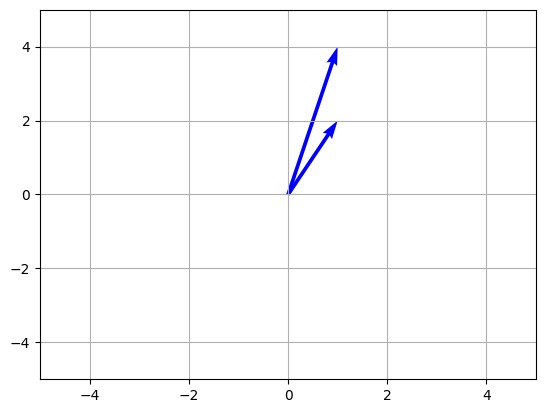

In [ ]:
vectors_1 = np.array([[1, 2], [1, 4]])  # Секој ред претставува вектор
vectors_2 = np.array([[1, 3]])

draw_2d_vectors(vectors_1)

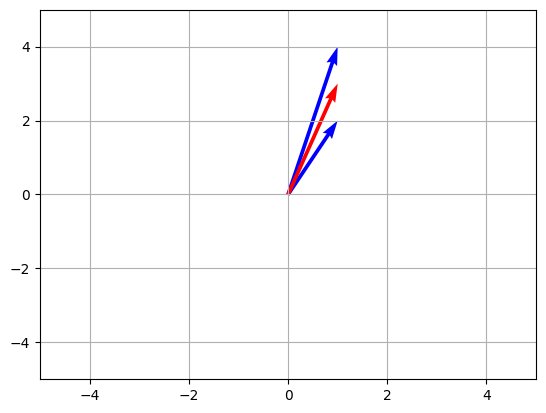

In [ ]:
draw_2d_vectors(vectors_1, vectors_2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


def draw_3d_vectors(before_vectors: np.ndarray, after_vectors: np.ndarray = None):
    """
    Функција за цртање на вектори во 3D простор.
    `before_vectors`: Низа од вектори. Векторите кои треба да се исцртат пред трансформација.
    `after_vectors`: (Опционално) Низа од вектори. Векторите кои треба да се исцртат по трансформација.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    origin_1 = np.zeros((before_vectors.shape[0], 3))

    ax.quiver(
        origin_1[:, 0], origin_1[:, 1], origin_1[:, 2],
        before_vectors[:, 0], before_vectors[:, 1], before_vectors[:, 2],
        color=['b'], arrow_length_ratio=.1
    )

    if after_vectors is not None:
        origin_2 = np.zeros((after_vectors.shape[0], 3))

        ax.quiver(
            origin_2[:, 0], origin_2[:, 1], origin_2[:, 2],
            after_vectors[:, 0], after_vectors[:, 1], after_vectors[:, 2],
            color=['r'], arrow_length_ratio=.1
        )

    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, 5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.view_init(elev=10)

    plt.show()


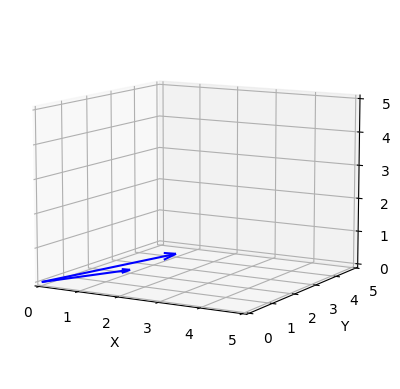

In [ ]:
vectors_1 = np.array([[1, 2, 0], [1, 4, 0]])
vectors_2 = np.array([[1, 3, 1]])

draw_3d_vectors(vectors_1)

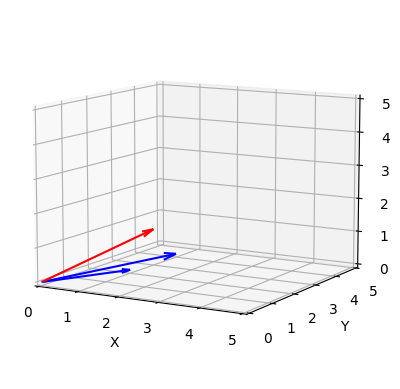

In [ ]:
draw_3d_vectors(vectors_1, vectors_2)

## Основен дел

Да се прикаже и интерпретира трансформацијата $A = \begin{bmatrix}m & 0 \\ 0 & n\end{bmatrix}$ на неколку 2D вектори за

а) $m = n$;  
b) $m \neq n$.

Да се прикажат векторите пред и после трансформацијата.

Да се прикаже и интерпретира трансформацијата $A = \begin{bmatrix}\cos (\theta) & \sin (\theta) \\ -\sin (\theta) & \cos (\theta) \end{bmatrix}$ на неколку 2D вектори за различни вредности на $\theta$.

Да се прикажат векторите пред и после трансформацијата.

Да се прикаже и интерпретира трансформацијата $A = \begin{bmatrix}\frac{1-m^2}{1+m^2} & \frac{2m}{1+m^2} \\ \frac{2m}{1+m^2} & \frac{m^2 - 1}{1+m^2}\end{bmatrix}$ на неколку 2D вектори за различни вредности на $m$

Да се прикажат векторите пред и после трансформацијата.

(Забелешка: Скицирај и неколку вектори кои лежат на правата $y = mx$, т.е. имаат координати $v(t) = \begin{bmatrix}t \\ mt \end{bmatrix}$. Неколку такви вектори $\begin{bmatrix}1 \\ m \end{bmatrix}$, $\begin{bmatrix}-2 \\ -2m \end{bmatrix}$, $\ldots$)

За секоја од претходните трансформации да се разгледа однесувањето на матриците $A^2$.

Да се прикажат векторите пред и после трансформацијата.

Ротација, рефлексија и скалирање се главни линеарни трансформации кои ги користиме над векторите.

Ефектите на овие трансформации може да ги поништиме со соодветна линеарна трансформација. Матрицата на оваа *поништувачка* трансформација е **инверзната матрица** на оригиналната трансформација.

Пример:
- Скалирање на фигура за фактор од $2$ може да се поништи со скалирање на истата фигура за фактор од $0.5$.
- Ротација на фигура за $60^\circ$ може да се поништи со ротација на фигурата со $-60^\circ$ односно $300^\circ$.

Како се поништува рефлексија над $y$-оската? Дефинирај ја матрицата и пресметај ја соодветната инверзна матрица.

Дали е потребно да пресметуваме инверзна матрица кај рефлексиите?

Дадени се векторите $v_1 = \begin{bmatrix}0 \\ 1\end{bmatrix}$ и $v_2 = \begin{bmatrix}1 \\ 4\end{bmatrix}$, како и линеарна трансформација дефинирана со матрицата $A = \begin{bmatrix}-3 & 1 \\ 15 & -5\end{bmatrix}$.

Да се прикажат векторите пред и после трансформација.

Да се пресмета инверзната матрица. Што забележуваш?

(Опционална задача)

Дали ефектот на транслација т.е. поместување на фигура низ 2D простор може да го постигнеме со конечна примена на трансформации споменати во погорните делови од оваа тетратка?

Ако да, демонстрирај процедура за транслација на фигура преку линеарни трансформации со произволно избрани вектори и матрици. Ако не, покажи дека постои вектор кој со конечна примена на линеарните трансформации не може да се транслира т.е. помести во 2D рамнината.

## Практичен дел

За овој дел ќе ви биде потребно да користите произволно избрана слика.

### Хомогени координати

Во претходните задачи зборувавме за дефинирањето на транслација на векторите во $\mathbb{R}^2$ како линеарна трансформација. (Дали беше можно?)

Елегантен начин за решавање на овој проблем е да ги прошириме векторите на следниот начин
$$\begin{bmatrix}x \\ y\end{bmatrix} \mapsto \begin{bmatrix}x \\ y\\ 1\end{bmatrix}.$$

Сега, транслација на сите точки од рамнината за вектор $b = \begin{bmatrix}h \\ k\end{bmatrix}$ се сведува на следното матрично множење
$$\begin{bmatrix}1 & 0 & h \\ 0 & 1 & k \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix}x \\ y \\ 1\end{bmatrix} = \begin{bmatrix}x + h \\ y + k \\ 1\end{bmatrix}.$$

Значи, **матрицата на транслација** за вектор $b = \begin{bmatrix}h \\ k\end{bmatrix}$ е зададена како $\begin{bmatrix}1 & 0 & h \\ 0 & 1 & k \\ 0 & 0 & 1\end{bmatrix}$.

**Останатите линеарни трансформации** во 2D зададени со некоја матрица $A = \begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix}$, ги имаат следните соодветни матрични репрезентации кај векторите со хомогени координати
$$\begin{bmatrix}a_1 & a_2 & 0 \\ a_3 & a_4 & 0 \\ 0 & 0 & 1\end{bmatrix}$$

<hr>

За вашата слика, користејќи го кодот подолу да се трансформира истата.
Трансформацијата треба да содржи транслација и барем две од следните: ротација, скалирање, рефлексија.

Составете ги матриците на линеарни трансформации.

In [ ]:
# Состави ги матриците, а потоа изврши ја ќелијата подолу и повикај ја функцијата `transform_image`
# На Colab: додади слика во истата сесија во `Files` делот

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image as mpimg


def transform_image(img_path: str, transform_matrix: np.ndarray):
    """
    Функција која ја прикажува трансформираната верзија на слика.
    `img_path`: патеката до сликата
    `transform_matrix`: матрицата на трансформација
    """
    img = mpimg.imread(img_path)
    height, width, _ = img.shape

    if img.max() > 1:
        img = img / img.max()

    x = np.linspace(0, 1, width)
    y = np.linspace(0, 1, height)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    Z = np.zeros_like(X)
    # Следната линија ја црта оригиналната слика, пред трансформирање
    # ax.plot_surface(X, Y, Z, rstride=5, cstride=5, facecolors=img, shade=False)

    points = np.vstack([X.flatten(), Y.flatten(), Z.flatten()])
    transformed_points = transform_matrix @ points

    X_rot = transformed_points[0, :].reshape(X.shape)
    Y_rot = transformed_points[1, :].reshape(Y.shape)
    Z_rot = transformed_points[2, :].reshape(Z.shape)

    # Следната линија ја црта трансформираната слика
    ax.plot_surface(X_rot, Y_rot, Z_rot, rstride=5, cstride=5, facecolors=img, shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

In [ ]:
img_path = ...
transform_matrix = ...

transform_image(img_path, transform_matrix)

### Перспективна проекција

Нека од точката $(0, 0, d)$ набљудуваме објект во 3D зададен со множество точки $\{d_1, d_2, \ldots, d_n\}$ каде $d_i = \begin{bmatrix}x \\ y \\ z\end{bmatrix}$ за $i \leqslant n$.

Овој објект може да го ембедираме/проектираме во $XY$ рамнината, пример доколку сакаме да го прикажеме истиот на компјутерски екран.

Користејќи хомогени координати за 3D точки, процесот на наоѓање на трансформираните точки е следен:

$$P \begin{bmatrix}x \\ y\\ z\\ 1\end{bmatrix} = \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & -\frac{1}{d} & 1\end{bmatrix}\begin{bmatrix}x \\ y\\ z\\ 1\end{bmatrix} = \begin{bmatrix}x \\ y\\ 0\\ 1 - \frac{z}{d}\end{bmatrix}$$
каде $P$ е матрица на проекцијата.

Бидејќи хомогените координати ги дефиниравме со константен член 1 во последната димензија, треба да направиме прескалирање делејќи со последната координата, па хомогените точки од векторите во $\mathbb{R}^3$ ќе бидат
$$\begin{bmatrix}x \\ y\\ 0\\ 1 - \frac{z}{d}\end{bmatrix} \mapsto \begin{bmatrix} \cfrac{x}{1 - \frac{z}{d}} \\ \cfrac{y}{1 - \frac{z}{d}} \\ 0\\ 1\end{bmatrix}.$$

<hr>

Нека $T$ е триаголник со темиња $\begin{bmatrix}9 \\ 3\\ -5\end{bmatrix}$, $\begin{bmatrix}12 \\ 8\\ 2\end{bmatrix}$ и $\begin{bmatrix}1.8\\ 2.7\\ 1\end{bmatrix}$.

Најди ја сликата на $T$ по перспективна проекција со центар во точката $\begin{bmatrix}0 \\ 0\\ 10\end{bmatrix}$.

Да се прикаже $T$ пред и после трансформацијата.